## Imports

In [1]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from dataset import LEVIRCDDataset
from utils import *
from model import *
from train import *

## Data Path

In [2]:

#train data
image_dir_A_train = '../data/lesson_1/train/A/'
image_dir_B_train = '../data/lesson_1/train/B/'
label_dir_train = '../data/lesson_1/train/label/'

#validation data
image_dir_A_val = '../data/lesson_1/val/A/'
image_dir_B_val = '../data/lesson_1/val/B/'
label_dir_val = '../data/lesson_1/val/label/'

#test data
image_dir_A_test = '../data/lesson_1/test/A/'
image_dir_B_test = '../data/lesson_1/test/B/'
label_dir_test = '../data/lesson_1/test/label/'


## Augmentation

In [3]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

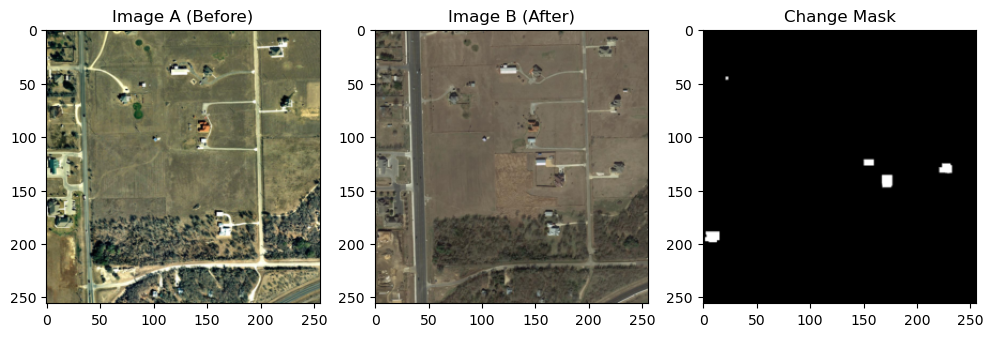

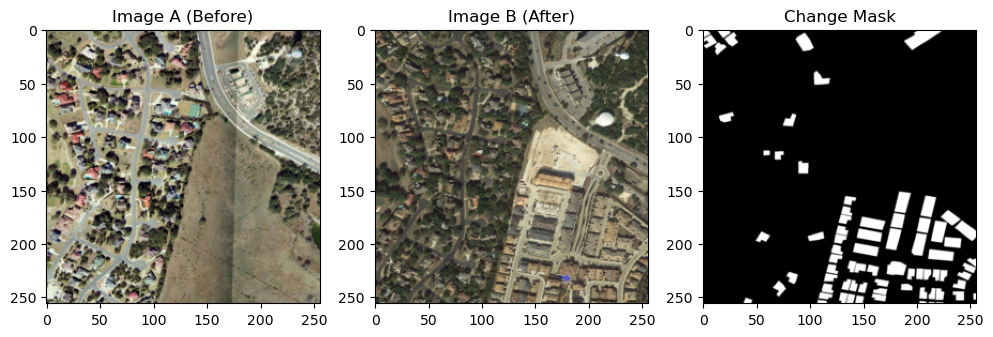

In [4]:
levir_cd_dataset_train = LEVIRCDDataset(image_dir_A_train, image_dir_B_train, label_dir_train, transform=transform)
traindataloader = DataLoader(levir_cd_dataset_train, batch_size=8, shuffle=True)
(image_A, image_B), label = next(iter(traindataloader))
show_images(image_A[0], image_B[0], label[0])
show_images(image_A[1], image_B[1], label[1])

## Model

In [5]:
model = UNet(in_channels=6, out_channels=1)
model.to(device); 

## Loss function and Optimizer

In [6]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

## Training

In [7]:
levir_cd_dataset_train = LEVIRCDDataset(image_dir_A_train, image_dir_B_train, label_dir_train, transform=transform)
levir_cd_dataset_val = LEVIRCDDataset(image_dir_A_val, image_dir_B_val, label_dir_val, transform=transform)
levir_cd_dataset_test = LEVIRCDDataset(image_dir_A_test, image_dir_B_test, label_dir_test, transform=transform)

# DataLoader
train_loader = DataLoader(levir_cd_dataset_train, batch_size=32, shuffle=True, num_workers=4, persistent_workers=True)
validate_loader = DataLoader(levir_cd_dataset_val, batch_size=32, shuffle=False, num_workers=4, persistent_workers=True)
test_loader = DataLoader(levir_cd_dataset_test, batch_size=32, shuffle=False, num_workers=4, persistent_workers=True)


In [8]:
train_losses, train_ious, train_dices, val_losses, val_ious, val_dices = train_model(model, criterion, optimizer,scheduler,train_loader, validate_loader, num_epochs=200, save_name='unet_levir_cd_baseline.pth')

  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 1/200, Training Loss: 0.4950, IoU: 0.0493, DICE: 0.0825
----------
Epoch 1/200, Validation Loss: 93.4670, IoU: 0.0420, DICE: 0.0770
----------
Saving the best model with IoU: 0.0419791005551815


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 2/200, Training Loss: 0.3258, IoU: 0.0508, DICE: 0.0824
----------
Epoch 2/200, Validation Loss: 0.3223, IoU: 0.0008, DICE: 0.0015
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 3/200, Training Loss: 0.2546, IoU: 0.1765, DICE: 0.2716
----------
Epoch 3/200, Validation Loss: 0.2337, IoU: 0.0159, DICE: 0.0297
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 4/200, Training Loss: 0.2027, IoU: 0.2695, DICE: 0.3859
----------
Epoch 4/200, Validation Loss: 0.1945, IoU: 0.2943, DICE: 0.4124
----------
Saving the best model with IoU: 0.2943364828824997


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 5/200, Training Loss: 0.1683, IoU: 0.3238, DICE: 0.4482
----------
Epoch 5/200, Validation Loss: 0.1570, IoU: 0.3471, DICE: 0.4717
----------
Saving the best model with IoU: 0.347070574760437


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 6/200, Training Loss: 0.1437, IoU: 0.3555, DICE: 0.4818
----------
Epoch 6/200, Validation Loss: 0.1963, IoU: 0.3164, DICE: 0.4377
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 7/200, Training Loss: 0.1263, IoU: 0.3608, DICE: 0.4867
----------
Epoch 7/200, Validation Loss: 0.1155, IoU: 0.3134, DICE: 0.4296
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 8/200, Training Loss: 0.1142, IoU: 0.3779, DICE: 0.5062
----------
Epoch 8/200, Validation Loss: 0.1473, IoU: 0.3435, DICE: 0.4652
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 9/200, Training Loss: 0.1041, IoU: 0.3824, DICE: 0.5065
----------
Epoch 9/200, Validation Loss: 0.0946, IoU: 0.3558, DICE: 0.4691
----------
Saving the best model with IoU: 0.35579913854599


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 10/200, Training Loss: 0.0959, IoU: 0.4068, DICE: 0.5337
----------
Epoch 10/200, Validation Loss: 0.0898, IoU: 0.3538, DICE: 0.4708
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 11/200, Training Loss: 0.0875, IoU: 0.4178, DICE: 0.5428
----------
Epoch 11/200, Validation Loss: 0.0960, IoU: 0.3861, DICE: 0.5027
----------
Saving the best model with IoU: 0.3860764354467392


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 12/200, Training Loss: 0.0809, IoU: 0.4357, DICE: 0.5595
----------
Epoch 12/200, Validation Loss: 0.0715, IoU: 0.4143, DICE: 0.5261
----------
Saving the best model with IoU: 0.4143151193857193


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 13/200, Training Loss: 0.0762, IoU: 0.4461, DICE: 0.5697
----------
Epoch 13/200, Validation Loss: 0.0975, IoU: 0.2248, DICE: 0.3240
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 14/200, Training Loss: 0.0745, IoU: 0.4457, DICE: 0.5689
----------
Epoch 14/200, Validation Loss: 0.0748, IoU: 0.3400, DICE: 0.4402
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 15/200, Training Loss: 0.0718, IoU: 0.4401, DICE: 0.5626
----------
Epoch 15/200, Validation Loss: 0.0685, IoU: 0.4199, DICE: 0.5343
----------
Saving the best model with IoU: 0.41993042826652527


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 16/200, Training Loss: 0.0696, IoU: 0.4515, DICE: 0.5738
----------
Epoch 16/200, Validation Loss: 0.0694, IoU: 0.4299, DICE: 0.5404
----------
Saving the best model with IoU: 0.4298855811357498


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 17/200, Training Loss: 0.0665, IoU: 0.4568, DICE: 0.5782
----------
Epoch 17/200, Validation Loss: 0.0692, IoU: 0.4156, DICE: 0.5313
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 18/200, Training Loss: 0.0633, IoU: 0.4629, DICE: 0.5844
----------
Epoch 18/200, Validation Loss: 0.0756, IoU: 0.4261, DICE: 0.5383
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 19/200, Training Loss: 0.0635, IoU: 0.4734, DICE: 0.5960
----------
Epoch 19/200, Validation Loss: 0.0636, IoU: 0.4464, DICE: 0.5586
----------
Saving the best model with IoU: 0.4464047849178314


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 20/200, Training Loss: 0.0615, IoU: 0.4644, DICE: 0.5850
----------
Epoch 20/200, Validation Loss: 0.0580, IoU: 0.4491, DICE: 0.5604
----------
Saving the best model with IoU: 0.44906266033649445


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 21/200, Training Loss: 0.0574, IoU: 0.4922, DICE: 0.6124
----------
Epoch 21/200, Validation Loss: 0.0553, IoU: 0.4495, DICE: 0.5561
----------
Saving the best model with IoU: 0.4494691640138626


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 22/200, Training Loss: 0.0552, IoU: 0.4940, DICE: 0.6112
----------
Epoch 22/200, Validation Loss: 0.0711, IoU: 0.3315, DICE: 0.4405
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 23/200, Training Loss: 0.0556, IoU: 0.4962, DICE: 0.6131
----------
Epoch 23/200, Validation Loss: 0.0568, IoU: 0.4397, DICE: 0.5500
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 24/200, Training Loss: 0.0549, IoU: 0.4869, DICE: 0.6038
----------
Epoch 24/200, Validation Loss: 0.0541, IoU: 0.4704, DICE: 0.5772
----------
Saving the best model with IoU: 0.4703918695449829


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 25/200, Training Loss: 0.0533, IoU: 0.5007, DICE: 0.6186
----------
Epoch 25/200, Validation Loss: 0.0541, IoU: 0.4074, DICE: 0.5195
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 26/200, Training Loss: 0.0523, IoU: 0.4993, DICE: 0.6168
----------
Epoch 26/200, Validation Loss: 0.0484, IoU: 0.4544, DICE: 0.5593
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 27/200, Training Loss: 0.0513, IoU: 0.5039, DICE: 0.6189
----------
Epoch 27/200, Validation Loss: 0.0470, IoU: 0.4767, DICE: 0.5795
----------
Saving the best model with IoU: 0.47670355439186096


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 28/200, Training Loss: 0.0509, IoU: 0.5098, DICE: 0.6257
----------
Epoch 28/200, Validation Loss: 0.0569, IoU: 0.4280, DICE: 0.5388
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 29/200, Training Loss: 0.0485, IoU: 0.5135, DICE: 0.6276
----------
Epoch 29/200, Validation Loss: 0.0484, IoU: 0.4462, DICE: 0.5471
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 30/200, Training Loss: 0.0463, IoU: 0.5286, DICE: 0.6401
----------
Epoch 30/200, Validation Loss: 0.0510, IoU: 0.4525, DICE: 0.5614
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 31/200, Training Loss: 0.0482, IoU: 0.5210, DICE: 0.6338
----------
Epoch 31/200, Validation Loss: 0.0547, IoU: 0.4201, DICE: 0.5230
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 32/200, Training Loss: 0.0483, IoU: 0.5099, DICE: 0.6246
----------
Epoch 32/200, Validation Loss: 0.0623, IoU: 0.3289, DICE: 0.4347
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 33/200, Training Loss: 0.0459, IoU: 0.5248, DICE: 0.6356
----------
Epoch 33/200, Validation Loss: 0.0465, IoU: 0.4609, DICE: 0.5593
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 34/200, Training Loss: 0.0461, IoU: 0.5190, DICE: 0.6301
----------
Epoch 34/200, Validation Loss: 0.0451, IoU: 0.4946, DICE: 0.5997
----------
Saving the best model with IoU: 0.4946480095386505


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 35/200, Training Loss: 0.0446, IoU: 0.5323, DICE: 0.6426
----------
Epoch 35/200, Validation Loss: 0.0452, IoU: 0.4618, DICE: 0.5606
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 36/200, Training Loss: 0.0448, IoU: 0.5340, DICE: 0.6453
----------
Epoch 36/200, Validation Loss: 0.0433, IoU: 0.4926, DICE: 0.5937
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 37/200, Training Loss: 0.0424, IoU: 0.5439, DICE: 0.6527
----------
Epoch 37/200, Validation Loss: 0.0415, IoU: 0.5058, DICE: 0.6034
----------
Saving the best model with IoU: 0.505768671631813


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 38/200, Training Loss: 0.0416, IoU: 0.5437, DICE: 0.6509
----------
Epoch 38/200, Validation Loss: 0.0419, IoU: 0.5071, DICE: 0.6090
----------
Saving the best model with IoU: 0.5070578157901764


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 39/200, Training Loss: 0.0407, IoU: 0.5576, DICE: 0.6646
----------
Epoch 39/200, Validation Loss: 0.0454, IoU: 0.4708, DICE: 0.5700
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 40/200, Training Loss: 0.0422, IoU: 0.5420, DICE: 0.6511
----------
Epoch 40/200, Validation Loss: 0.0453, IoU: 0.4849, DICE: 0.5844
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 41/200, Training Loss: 0.0399, IoU: 0.5561, DICE: 0.6624
----------
Epoch 41/200, Validation Loss: 0.0408, IoU: 0.5020, DICE: 0.6028
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 42/200, Training Loss: 0.0412, IoU: 0.5470, DICE: 0.6552
----------
Epoch 42/200, Validation Loss: 0.0430, IoU: 0.5010, DICE: 0.6030
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 43/200, Training Loss: 0.0425, IoU: 0.5426, DICE: 0.6533
----------
Epoch 43/200, Validation Loss: 0.0474, IoU: 0.4427, DICE: 0.5408
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 44/200, Training Loss: 0.0406, IoU: 0.5420, DICE: 0.6501
----------
Epoch 44/200, Validation Loss: 0.0603, IoU: 0.3866, DICE: 0.4864
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 45/200, Training Loss: 0.0401, IoU: 0.5490, DICE: 0.6549
----------
Epoch 45/200, Validation Loss: 0.0469, IoU: 0.4537, DICE: 0.5590
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 46/200, Training Loss: 0.0378, IoU: 0.5675, DICE: 0.6715
----------
Epoch 46/200, Validation Loss: 0.0399, IoU: 0.4953, DICE: 0.5917
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 47/200, Training Loss: 0.0374, IoU: 0.5696, DICE: 0.6747
----------
Epoch 47/200, Validation Loss: 0.0388, IoU: 0.5228, DICE: 0.6210
----------
Saving the best model with IoU: 0.5227612257003784


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 48/200, Training Loss: 0.0368, IoU: 0.5684, DICE: 0.6710
----------
Epoch 48/200, Validation Loss: 0.0392, IoU: 0.5161, DICE: 0.6123
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 49/200, Training Loss: 0.0387, IoU: 0.5619, DICE: 0.6676
----------
Epoch 49/200, Validation Loss: 0.0453, IoU: 0.4789, DICE: 0.5832
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 50/200, Training Loss: 0.0388, IoU: 0.5560, DICE: 0.6628
----------
Epoch 50/200, Validation Loss: 0.0423, IoU: 0.5098, DICE: 0.6126
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 51/200, Training Loss: 0.0365, IoU: 0.5818, DICE: 0.6854
----------
Epoch 51/200, Validation Loss: 0.0375, IoU: 0.5286, DICE: 0.6281
----------
Saving the best model with IoU: 0.5286369323730469


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 52/200, Training Loss: 0.0355, IoU: 0.5801, DICE: 0.6817
----------
Epoch 52/200, Validation Loss: 0.0366, IoU: 0.5256, DICE: 0.6234
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 53/200, Training Loss: 0.0354, IoU: 0.5799, DICE: 0.6814
----------
Epoch 53/200, Validation Loss: 0.0365, IoU: 0.5227, DICE: 0.6184
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 54/200, Training Loss: 0.0350, IoU: 0.5827, DICE: 0.6843
----------
Epoch 54/200, Validation Loss: 0.0363, IoU: 0.5310, DICE: 0.6291
----------
Saving the best model with IoU: 0.5310022681951523


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 55/200, Training Loss: 0.0347, IoU: 0.5863, DICE: 0.6881
----------
Epoch 55/200, Validation Loss: 0.0363, IoU: 0.5305, DICE: 0.6276
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 56/200, Training Loss: 0.0343, IoU: 0.5883, DICE: 0.6889
----------
Epoch 56/200, Validation Loss: 0.0360, IoU: 0.5305, DICE: 0.6273
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 57/200, Training Loss: 0.0342, IoU: 0.5872, DICE: 0.6873
----------
Epoch 57/200, Validation Loss: 0.0360, IoU: 0.5294, DICE: 0.6251
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 58/200, Training Loss: 0.0340, IoU: 0.5911, DICE: 0.6916
----------
Epoch 58/200, Validation Loss: 0.0361, IoU: 0.5306, DICE: 0.6256
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 59/200, Training Loss: 0.0341, IoU: 0.5940, DICE: 0.6940
----------
Epoch 59/200, Validation Loss: 0.0359, IoU: 0.5328, DICE: 0.6284
----------
Saving the best model with IoU: 0.5328001528978348


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 60/200, Training Loss: 0.0344, IoU: 0.5881, DICE: 0.6896
----------
Epoch 60/200, Validation Loss: 0.0358, IoU: 0.5292, DICE: 0.6247
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 61/200, Training Loss: 0.0339, IoU: 0.5941, DICE: 0.6943
----------
Epoch 61/200, Validation Loss: 0.0362, IoU: 0.5294, DICE: 0.6240
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 62/200, Training Loss: 0.0337, IoU: 0.5964, DICE: 0.6975
----------
Epoch 62/200, Validation Loss: 0.0361, IoU: 0.5292, DICE: 0.6253
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 63/200, Training Loss: 0.0334, IoU: 0.5986, DICE: 0.6987
----------
Epoch 63/200, Validation Loss: 0.0359, IoU: 0.5339, DICE: 0.6301
----------
Saving the best model with IoU: 0.5338755249977112


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 64/200, Training Loss: 0.0335, IoU: 0.5951, DICE: 0.6949
----------
Epoch 64/200, Validation Loss: 0.0359, IoU: 0.5344, DICE: 0.6301
----------
Saving the best model with IoU: 0.5343567132949829


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 65/200, Training Loss: 0.0335, IoU: 0.5951, DICE: 0.6950
----------
Epoch 65/200, Validation Loss: 0.0360, IoU: 0.5305, DICE: 0.6243
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 66/200, Training Loss: 0.0333, IoU: 0.5981, DICE: 0.6975
----------
Epoch 66/200, Validation Loss: 0.0357, IoU: 0.5357, DICE: 0.6320
----------
Saving the best model with IoU: 0.5356928110122681


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 67/200, Training Loss: 0.0334, IoU: 0.5998, DICE: 0.6999
----------
Epoch 67/200, Validation Loss: 0.0362, IoU: 0.5301, DICE: 0.6251
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 68/200, Training Loss: 0.0332, IoU: 0.5981, DICE: 0.6972
----------
Epoch 68/200, Validation Loss: 0.0359, IoU: 0.5365, DICE: 0.6317
----------
Saving the best model with IoU: 0.5365102291107178


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 69/200, Training Loss: 0.0334, IoU: 0.5959, DICE: 0.6955
----------
Epoch 69/200, Validation Loss: 0.0356, IoU: 0.5351, DICE: 0.6320
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 70/200, Training Loss: 0.0332, IoU: 0.6005, DICE: 0.7007
----------
Epoch 70/200, Validation Loss: 0.0359, IoU: 0.5344, DICE: 0.6305
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 71/200, Training Loss: 0.0330, IoU: 0.6011, DICE: 0.7010
----------
Epoch 71/200, Validation Loss: 0.0357, IoU: 0.5356, DICE: 0.6317
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 72/200, Training Loss: 0.0331, IoU: 0.6027, DICE: 0.7029
----------
Epoch 72/200, Validation Loss: 0.0357, IoU: 0.5343, DICE: 0.6302
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 73/200, Training Loss: 0.0332, IoU: 0.5987, DICE: 0.6987
----------
Epoch 73/200, Validation Loss: 0.0358, IoU: 0.5355, DICE: 0.6302
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 74/200, Training Loss: 0.0328, IoU: 0.6058, DICE: 0.7054
----------
Epoch 74/200, Validation Loss: 0.0360, IoU: 0.5335, DICE: 0.6301
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 75/200, Training Loss: 0.0334, IoU: 0.6027, DICE: 0.7037
----------
Epoch 75/200, Validation Loss: 0.0358, IoU: 0.5384, DICE: 0.6348
----------
Saving the best model with IoU: 0.5384422540664673


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 76/200, Training Loss: 0.0330, IoU: 0.6023, DICE: 0.7023
----------
Epoch 76/200, Validation Loss: 0.0355, IoU: 0.5338, DICE: 0.6285
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 77/200, Training Loss: 0.0325, IoU: 0.6059, DICE: 0.7052
----------
Epoch 77/200, Validation Loss: 0.0356, IoU: 0.5380, DICE: 0.6335
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 78/200, Training Loss: 0.0328, IoU: 0.6014, DICE: 0.6997
----------
Epoch 78/200, Validation Loss: 0.0357, IoU: 0.5356, DICE: 0.6328
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 79/200, Training Loss: 0.0325, IoU: 0.6032, DICE: 0.7020
----------
Epoch 79/200, Validation Loss: 0.0357, IoU: 0.5361, DICE: 0.6312
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 80/200, Training Loss: 0.0324, IoU: 0.6088, DICE: 0.7073
----------
Epoch 80/200, Validation Loss: 0.0358, IoU: 0.5338, DICE: 0.6302
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 81/200, Training Loss: 0.0325, IoU: 0.6054, DICE: 0.7038
----------
Epoch 81/200, Validation Loss: 0.0359, IoU: 0.5354, DICE: 0.6320
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 82/200, Training Loss: 0.0325, IoU: 0.6018, DICE: 0.7003
----------
Epoch 82/200, Validation Loss: 0.0357, IoU: 0.5370, DICE: 0.6334
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 83/200, Training Loss: 0.0323, IoU: 0.6078, DICE: 0.7072
----------
Epoch 83/200, Validation Loss: 0.0356, IoU: 0.5374, DICE: 0.6323
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 84/200, Training Loss: 0.0322, IoU: 0.6103, DICE: 0.7086
----------
Epoch 84/200, Validation Loss: 0.0357, IoU: 0.5366, DICE: 0.6325
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 85/200, Training Loss: 0.0322, IoU: 0.6077, DICE: 0.7062
----------
Epoch 85/200, Validation Loss: 0.0358, IoU: 0.5386, DICE: 0.6349
----------
Saving the best model with IoU: 0.5386406779289246


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 86/200, Training Loss: 0.0321, IoU: 0.6077, DICE: 0.7052
----------
Epoch 86/200, Validation Loss: 0.0355, IoU: 0.5389, DICE: 0.6347
----------
Saving the best model with IoU: 0.5389251112937927


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 87/200, Training Loss: 0.0322, IoU: 0.6086, DICE: 0.7066
----------
Epoch 87/200, Validation Loss: 0.0361, IoU: 0.5330, DICE: 0.6281
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 88/200, Training Loss: 0.0321, IoU: 0.6099, DICE: 0.7068
----------
Epoch 88/200, Validation Loss: 0.0355, IoU: 0.5386, DICE: 0.6354
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 89/200, Training Loss: 0.0322, IoU: 0.6049, DICE: 0.7043
----------
Epoch 89/200, Validation Loss: 0.0355, IoU: 0.5367, DICE: 0.6333
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 90/200, Training Loss: 0.0321, IoU: 0.6121, DICE: 0.7104
----------
Epoch 90/200, Validation Loss: 0.0364, IoU: 0.5322, DICE: 0.6292
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 91/200, Training Loss: 0.0321, IoU: 0.6093, DICE: 0.7072
----------
Epoch 91/200, Validation Loss: 0.0362, IoU: 0.5377, DICE: 0.6333
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 92/200, Training Loss: 0.0321, IoU: 0.6083, DICE: 0.7071
----------
Epoch 92/200, Validation Loss: 0.0358, IoU: 0.5369, DICE: 0.6321
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 93/200, Training Loss: 0.0319, IoU: 0.6128, DICE: 0.7106
----------
Epoch 93/200, Validation Loss: 0.0362, IoU: 0.5342, DICE: 0.6289
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 94/200, Training Loss: 0.0319, IoU: 0.6032, DICE: 0.7006
----------
Epoch 94/200, Validation Loss: 0.0356, IoU: 0.5373, DICE: 0.6346
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 95/200, Training Loss: 0.0318, IoU: 0.6162, DICE: 0.7141
----------
Epoch 95/200, Validation Loss: 0.0357, IoU: 0.5356, DICE: 0.6295
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 96/200, Training Loss: 0.0317, IoU: 0.6152, DICE: 0.7133
----------
Epoch 96/200, Validation Loss: 0.0356, IoU: 0.5376, DICE: 0.6341
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 97/200, Training Loss: 0.0317, IoU: 0.6101, DICE: 0.7087
----------
Epoch 97/200, Validation Loss: 0.0358, IoU: 0.5394, DICE: 0.6338
----------
Saving the best model with IoU: 0.5393703579902649


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 98/200, Training Loss: 0.0316, IoU: 0.6126, DICE: 0.7106
----------
Epoch 98/200, Validation Loss: 0.0363, IoU: 0.5322, DICE: 0.6291
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 99/200, Training Loss: 0.0317, IoU: 0.6097, DICE: 0.7076
----------
Epoch 99/200, Validation Loss: 0.0368, IoU: 0.5354, DICE: 0.6306
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 100/200, Training Loss: 0.0314, IoU: 0.6176, DICE: 0.7156
----------
Epoch 100/200, Validation Loss: 0.0359, IoU: 0.5388, DICE: 0.6359
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 101/200, Training Loss: 0.0311, IoU: 0.6160, DICE: 0.7134
----------
Epoch 101/200, Validation Loss: 0.0357, IoU: 0.5395, DICE: 0.6354
----------
Saving the best model with IoU: 0.5394888520240784


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 102/200, Training Loss: 0.0312, IoU: 0.6155, DICE: 0.7129
----------
Epoch 102/200, Validation Loss: 0.0357, IoU: 0.5384, DICE: 0.6337
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 103/200, Training Loss: 0.0313, IoU: 0.6119, DICE: 0.7081
----------
Epoch 103/200, Validation Loss: 0.0357, IoU: 0.5383, DICE: 0.6338
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 104/200, Training Loss: 0.0310, IoU: 0.6162, DICE: 0.7132
----------
Epoch 104/200, Validation Loss: 0.0356, IoU: 0.5386, DICE: 0.6341
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 105/200, Training Loss: 0.0311, IoU: 0.6180, DICE: 0.7148
----------
Epoch 105/200, Validation Loss: 0.0356, IoU: 0.5381, DICE: 0.6337
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 106/200, Training Loss: 0.0311, IoU: 0.6151, DICE: 0.7116
----------
Epoch 106/200, Validation Loss: 0.0357, IoU: 0.5379, DICE: 0.6337
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 107/200, Training Loss: 0.0310, IoU: 0.6179, DICE: 0.7141
----------
Epoch 107/200, Validation Loss: 0.0357, IoU: 0.5374, DICE: 0.6330
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 108/200, Training Loss: 0.0310, IoU: 0.6177, DICE: 0.7138
----------
Epoch 108/200, Validation Loss: 0.0357, IoU: 0.5367, DICE: 0.6322
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 109/200, Training Loss: 0.0311, IoU: 0.6160, DICE: 0.7125
----------
Epoch 109/200, Validation Loss: 0.0357, IoU: 0.5366, DICE: 0.6325
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 110/200, Training Loss: 0.0311, IoU: 0.6154, DICE: 0.7124
----------
Epoch 110/200, Validation Loss: 0.0356, IoU: 0.5362, DICE: 0.6321
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 111/200, Training Loss: 0.0311, IoU: 0.6162, DICE: 0.7131
----------
Epoch 111/200, Validation Loss: 0.0356, IoU: 0.5371, DICE: 0.6325
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 112/200, Training Loss: 0.0311, IoU: 0.6162, DICE: 0.7130
----------
Epoch 112/200, Validation Loss: 0.0357, IoU: 0.5366, DICE: 0.6322
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 113/200, Training Loss: 0.0311, IoU: 0.6158, DICE: 0.7125
----------
Epoch 113/200, Validation Loss: 0.0356, IoU: 0.5365, DICE: 0.6325
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 114/200, Training Loss: 0.0313, IoU: 0.6160, DICE: 0.7130
----------
Epoch 114/200, Validation Loss: 0.0357, IoU: 0.5361, DICE: 0.6320
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 115/200, Training Loss: 0.0311, IoU: 0.6157, DICE: 0.7121
----------
Epoch 115/200, Validation Loss: 0.0357, IoU: 0.5367, DICE: 0.6325
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 116/200, Training Loss: 0.0311, IoU: 0.6134, DICE: 0.7096
----------
Epoch 116/200, Validation Loss: 0.0357, IoU: 0.5362, DICE: 0.6318
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 117/200, Training Loss: 0.0311, IoU: 0.6197, DICE: 0.7170
----------
Epoch 117/200, Validation Loss: 0.0358, IoU: 0.5367, DICE: 0.6326
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 118/200, Training Loss: 0.0311, IoU: 0.6153, DICE: 0.7118
----------
Epoch 118/200, Validation Loss: 0.0358, IoU: 0.5373, DICE: 0.6332
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 119/200, Training Loss: 0.0310, IoU: 0.6173, DICE: 0.7133
----------
Epoch 119/200, Validation Loss: 0.0357, IoU: 0.5365, DICE: 0.6320
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 120/200, Training Loss: 0.0311, IoU: 0.6160, DICE: 0.7125
----------
Epoch 120/200, Validation Loss: 0.0358, IoU: 0.5371, DICE: 0.6330
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 121/200, Training Loss: 0.0311, IoU: 0.6160, DICE: 0.7125
----------
Epoch 121/200, Validation Loss: 0.0357, IoU: 0.5373, DICE: 0.6335
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 122/200, Training Loss: 0.0312, IoU: 0.6169, DICE: 0.7144
----------
Epoch 122/200, Validation Loss: 0.0357, IoU: 0.5370, DICE: 0.6334
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 123/200, Training Loss: 0.0312, IoU: 0.6190, DICE: 0.7160
----------
Epoch 123/200, Validation Loss: 0.0357, IoU: 0.5368, DICE: 0.6332
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 124/200, Training Loss: 0.0310, IoU: 0.6166, DICE: 0.7129
----------
Epoch 124/200, Validation Loss: 0.0357, IoU: 0.5366, DICE: 0.6328
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 125/200, Training Loss: 0.0310, IoU: 0.6165, DICE: 0.7126
----------
Epoch 125/200, Validation Loss: 0.0357, IoU: 0.5367, DICE: 0.6328
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 126/200, Training Loss: 0.0310, IoU: 0.6192, DICE: 0.7153
----------
Epoch 126/200, Validation Loss: 0.0357, IoU: 0.5371, DICE: 0.6328
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 127/200, Training Loss: 0.0312, IoU: 0.6157, DICE: 0.7117
----------
Epoch 127/200, Validation Loss: 0.0358, IoU: 0.5360, DICE: 0.6320
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 128/200, Training Loss: 0.0308, IoU: 0.6208, DICE: 0.7170
----------
Epoch 128/200, Validation Loss: 0.0357, IoU: 0.5362, DICE: 0.6323
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 129/200, Training Loss: 0.0308, IoU: 0.6180, DICE: 0.7141
----------
Epoch 129/200, Validation Loss: 0.0357, IoU: 0.5374, DICE: 0.6335
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 130/200, Training Loss: 0.0309, IoU: 0.6210, DICE: 0.7177
----------
Epoch 130/200, Validation Loss: 0.0356, IoU: 0.5368, DICE: 0.6327
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 131/200, Training Loss: 0.0309, IoU: 0.6173, DICE: 0.7134
----------
Epoch 131/200, Validation Loss: 0.0356, IoU: 0.5374, DICE: 0.6329
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 132/200, Training Loss: 0.0307, IoU: 0.6217, DICE: 0.7180
----------
Epoch 132/200, Validation Loss: 0.0357, IoU: 0.5369, DICE: 0.6329
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 133/200, Training Loss: 0.0309, IoU: 0.6178, DICE: 0.7141
----------
Epoch 133/200, Validation Loss: 0.0356, IoU: 0.5377, DICE: 0.6337
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 134/200, Training Loss: 0.0310, IoU: 0.6177, DICE: 0.7140
----------
Epoch 134/200, Validation Loss: 0.0357, IoU: 0.5371, DICE: 0.6336
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 135/200, Training Loss: 0.0311, IoU: 0.6172, DICE: 0.7144
----------
Epoch 135/200, Validation Loss: 0.0356, IoU: 0.5377, DICE: 0.6340
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 136/200, Training Loss: 0.0307, IoU: 0.6207, DICE: 0.7166
----------
Epoch 136/200, Validation Loss: 0.0356, IoU: 0.5380, DICE: 0.6342
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 137/200, Training Loss: 0.0307, IoU: 0.6195, DICE: 0.7157
----------
Epoch 137/200, Validation Loss: 0.0357, IoU: 0.5372, DICE: 0.6334
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 138/200, Training Loss: 0.0308, IoU: 0.6193, DICE: 0.7162
----------
Epoch 138/200, Validation Loss: 0.0356, IoU: 0.5371, DICE: 0.6333
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 139/200, Training Loss: 0.0308, IoU: 0.6224, DICE: 0.7189
----------
Epoch 139/200, Validation Loss: 0.0357, IoU: 0.5375, DICE: 0.6340
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 140/200, Training Loss: 0.0307, IoU: 0.6224, DICE: 0.7187
----------
Epoch 140/200, Validation Loss: 0.0357, IoU: 0.5376, DICE: 0.6339
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 141/200, Training Loss: 0.0307, IoU: 0.6198, DICE: 0.7158
----------
Epoch 141/200, Validation Loss: 0.0357, IoU: 0.5384, DICE: 0.6346
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 142/200, Training Loss: 0.0307, IoU: 0.6196, DICE: 0.7157
----------
Epoch 142/200, Validation Loss: 0.0357, IoU: 0.5374, DICE: 0.6337
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 143/200, Training Loss: 0.0308, IoU: 0.6212, DICE: 0.7172
----------
Epoch 143/200, Validation Loss: 0.0358, IoU: 0.5380, DICE: 0.6344
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 144/200, Training Loss: 0.0309, IoU: 0.6211, DICE: 0.7177
----------
Epoch 144/200, Validation Loss: 0.0357, IoU: 0.5373, DICE: 0.6337
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 145/200, Training Loss: 0.0308, IoU: 0.6203, DICE: 0.7161
----------
Epoch 145/200, Validation Loss: 0.0357, IoU: 0.5382, DICE: 0.6346
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 146/200, Training Loss: 0.0307, IoU: 0.6222, DICE: 0.7185
----------
Epoch 146/200, Validation Loss: 0.0357, IoU: 0.5374, DICE: 0.6335
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 147/200, Training Loss: 0.0307, IoU: 0.6205, DICE: 0.7166
----------
Epoch 147/200, Validation Loss: 0.0357, IoU: 0.5372, DICE: 0.6336
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 148/200, Training Loss: 0.0306, IoU: 0.6229, DICE: 0.7191
----------
Epoch 148/200, Validation Loss: 0.0358, IoU: 0.5368, DICE: 0.6329
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 149/200, Training Loss: 0.0307, IoU: 0.6225, DICE: 0.7182
----------
Epoch 149/200, Validation Loss: 0.0358, IoU: 0.5365, DICE: 0.6324
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 150/200, Training Loss: 0.0307, IoU: 0.6187, DICE: 0.7148
----------
Epoch 150/200, Validation Loss: 0.0357, IoU: 0.5363, DICE: 0.6320
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 151/200, Training Loss: 0.0309, IoU: 0.6205, DICE: 0.7167
----------
Epoch 151/200, Validation Loss: 0.0357, IoU: 0.5368, DICE: 0.6328
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 152/200, Training Loss: 0.0308, IoU: 0.6205, DICE: 0.7170
----------
Epoch 152/200, Validation Loss: 0.0357, IoU: 0.5361, DICE: 0.6321
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 153/200, Training Loss: 0.0309, IoU: 0.6212, DICE: 0.7179
----------
Epoch 153/200, Validation Loss: 0.0357, IoU: 0.5374, DICE: 0.6336
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 154/200, Training Loss: 0.0306, IoU: 0.6242, DICE: 0.7203
----------
Epoch 154/200, Validation Loss: 0.0357, IoU: 0.5364, DICE: 0.6327
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 155/200, Training Loss: 0.0308, IoU: 0.6193, DICE: 0.7156
----------
Epoch 155/200, Validation Loss: 0.0358, IoU: 0.5363, DICE: 0.6325
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 156/200, Training Loss: 0.0305, IoU: 0.6213, DICE: 0.7171
----------
Epoch 156/200, Validation Loss: 0.0357, IoU: 0.5370, DICE: 0.6330
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 157/200, Training Loss: 0.0307, IoU: 0.6171, DICE: 0.7129
----------
Epoch 157/200, Validation Loss: 0.0357, IoU: 0.5374, DICE: 0.6336
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 158/200, Training Loss: 0.0306, IoU: 0.6216, DICE: 0.7176
----------
Epoch 158/200, Validation Loss: 0.0358, IoU: 0.5372, DICE: 0.6336
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 159/200, Training Loss: 0.0305, IoU: 0.6213, DICE: 0.7171
----------
Epoch 159/200, Validation Loss: 0.0357, IoU: 0.5379, DICE: 0.6339
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 160/200, Training Loss: 0.0306, IoU: 0.6200, DICE: 0.7159
----------
Epoch 160/200, Validation Loss: 0.0357, IoU: 0.5378, DICE: 0.6340
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 161/200, Training Loss: 0.0305, IoU: 0.6212, DICE: 0.7165
----------
Epoch 161/200, Validation Loss: 0.0357, IoU: 0.5371, DICE: 0.6332
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 162/200, Training Loss: 0.0306, IoU: 0.6217, DICE: 0.7175
----------
Epoch 162/200, Validation Loss: 0.0357, IoU: 0.5373, DICE: 0.6333
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 163/200, Training Loss: 0.0307, IoU: 0.6191, DICE: 0.7158
----------
Epoch 163/200, Validation Loss: 0.0357, IoU: 0.5378, DICE: 0.6337
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 164/200, Training Loss: 0.0305, IoU: 0.6227, DICE: 0.7185
----------
Epoch 164/200, Validation Loss: 0.0357, IoU: 0.5372, DICE: 0.6333
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 165/200, Training Loss: 0.0306, IoU: 0.6213, DICE: 0.7174
----------
Epoch 165/200, Validation Loss: 0.0357, IoU: 0.5380, DICE: 0.6343
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 166/200, Training Loss: 0.0307, IoU: 0.6192, DICE: 0.7144
----------
Epoch 166/200, Validation Loss: 0.0357, IoU: 0.5376, DICE: 0.6340
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 167/200, Training Loss: 0.0307, IoU: 0.6230, DICE: 0.7192
----------
Epoch 167/200, Validation Loss: 0.0356, IoU: 0.5376, DICE: 0.6337
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 168/200, Training Loss: 0.0306, IoU: 0.6213, DICE: 0.7169
----------
Epoch 168/200, Validation Loss: 0.0357, IoU: 0.5378, DICE: 0.6339
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 169/200, Training Loss: 0.0305, IoU: 0.6224, DICE: 0.7186
----------
Epoch 169/200, Validation Loss: 0.0357, IoU: 0.5373, DICE: 0.6336
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 170/200, Training Loss: 0.0305, IoU: 0.6216, DICE: 0.7176
----------
Epoch 170/200, Validation Loss: 0.0357, IoU: 0.5377, DICE: 0.6338
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 171/200, Training Loss: 0.0308, IoU: 0.6204, DICE: 0.7170
----------
Epoch 171/200, Validation Loss: 0.0357, IoU: 0.5374, DICE: 0.6336
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 172/200, Training Loss: 0.0306, IoU: 0.6219, DICE: 0.7179
----------
Epoch 172/200, Validation Loss: 0.0357, IoU: 0.5371, DICE: 0.6334
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 173/200, Training Loss: 0.0306, IoU: 0.6232, DICE: 0.7191
----------
Epoch 173/200, Validation Loss: 0.0357, IoU: 0.5375, DICE: 0.6336
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 174/200, Training Loss: 0.0307, IoU: 0.6202, DICE: 0.7159
----------
Epoch 174/200, Validation Loss: 0.0357, IoU: 0.5367, DICE: 0.6328
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 175/200, Training Loss: 0.0307, IoU: 0.6195, DICE: 0.7154
----------
Epoch 175/200, Validation Loss: 0.0357, IoU: 0.5375, DICE: 0.6339
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 176/200, Training Loss: 0.0307, IoU: 0.6200, DICE: 0.7164
----------
Epoch 176/200, Validation Loss: 0.0357, IoU: 0.5379, DICE: 0.6341
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 177/200, Training Loss: 0.0307, IoU: 0.6190, DICE: 0.7147
----------
Epoch 177/200, Validation Loss: 0.0358, IoU: 0.5376, DICE: 0.6341
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 178/200, Training Loss: 0.0308, IoU: 0.6194, DICE: 0.7161
----------
Epoch 178/200, Validation Loss: 0.0357, IoU: 0.5380, DICE: 0.6343
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 179/200, Training Loss: 0.0307, IoU: 0.6216, DICE: 0.7176
----------
Epoch 179/200, Validation Loss: 0.0357, IoU: 0.5373, DICE: 0.6336
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 180/200, Training Loss: 0.0305, IoU: 0.6221, DICE: 0.7177
----------
Epoch 180/200, Validation Loss: 0.0357, IoU: 0.5380, DICE: 0.6344
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 181/200, Training Loss: 0.0305, IoU: 0.6214, DICE: 0.7171
----------
Epoch 181/200, Validation Loss: 0.0357, IoU: 0.5380, DICE: 0.6343
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 182/200, Training Loss: 0.0307, IoU: 0.6214, DICE: 0.7173
----------
Epoch 182/200, Validation Loss: 0.0357, IoU: 0.5384, DICE: 0.6348
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 183/200, Training Loss: 0.0307, IoU: 0.6186, DICE: 0.7145
----------
Epoch 183/200, Validation Loss: 0.0357, IoU: 0.5379, DICE: 0.6341
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 184/200, Training Loss: 0.0308, IoU: 0.6212, DICE: 0.7170
----------
Epoch 184/200, Validation Loss: 0.0357, IoU: 0.5367, DICE: 0.6331
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 185/200, Training Loss: 0.0305, IoU: 0.6220, DICE: 0.7184
----------
Epoch 185/200, Validation Loss: 0.0357, IoU: 0.5375, DICE: 0.6337
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 186/200, Training Loss: 0.0308, IoU: 0.6184, DICE: 0.7147
----------
Epoch 186/200, Validation Loss: 0.0357, IoU: 0.5383, DICE: 0.6348
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 187/200, Training Loss: 0.0305, IoU: 0.6219, DICE: 0.7180
----------
Epoch 187/200, Validation Loss: 0.0356, IoU: 0.5374, DICE: 0.6339
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 188/200, Training Loss: 0.0309, IoU: 0.6173, DICE: 0.7146
----------
Epoch 188/200, Validation Loss: 0.0356, IoU: 0.5374, DICE: 0.6339
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 189/200, Training Loss: 0.0306, IoU: 0.6220, DICE: 0.7175
----------
Epoch 189/200, Validation Loss: 0.0357, IoU: 0.5380, DICE: 0.6343
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 190/200, Training Loss: 0.0306, IoU: 0.6222, DICE: 0.7181
----------
Epoch 190/200, Validation Loss: 0.0357, IoU: 0.5380, DICE: 0.6345
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 191/200, Training Loss: 0.0307, IoU: 0.6237, DICE: 0.7201
----------
Epoch 191/200, Validation Loss: 0.0357, IoU: 0.5382, DICE: 0.6347
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 192/200, Training Loss: 0.0309, IoU: 0.6189, DICE: 0.7160
----------
Epoch 192/200, Validation Loss: 0.0357, IoU: 0.5376, DICE: 0.6339
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 193/200, Training Loss: 0.0306, IoU: 0.6213, DICE: 0.7170
----------
Epoch 193/200, Validation Loss: 0.0357, IoU: 0.5382, DICE: 0.6344
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 194/200, Training Loss: 0.0307, IoU: 0.6212, DICE: 0.7172
----------
Epoch 194/200, Validation Loss: 0.0357, IoU: 0.5370, DICE: 0.6331
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 195/200, Training Loss: 0.0306, IoU: 0.6221, DICE: 0.7180
----------
Epoch 195/200, Validation Loss: 0.0357, IoU: 0.5368, DICE: 0.6327
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 196/200, Training Loss: 0.0306, IoU: 0.6246, DICE: 0.7209
----------
Epoch 196/200, Validation Loss: 0.0357, IoU: 0.5373, DICE: 0.6333
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 197/200, Training Loss: 0.0308, IoU: 0.6217, DICE: 0.7179
----------
Epoch 197/200, Validation Loss: 0.0357, IoU: 0.5381, DICE: 0.6342
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 198/200, Training Loss: 0.0305, IoU: 0.6219, DICE: 0.7178
----------
Epoch 198/200, Validation Loss: 0.0357, IoU: 0.5378, DICE: 0.6336
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 199/200, Training Loss: 0.0306, IoU: 0.6204, DICE: 0.7159
----------
Epoch 199/200, Validation Loss: 0.0357, IoU: 0.5380, DICE: 0.6341
----------


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch 200/200, Training Loss: 0.0307, IoU: 0.6213, DICE: 0.7178
----------
Epoch 200/200, Validation Loss: 0.0358, IoU: 0.5378, DICE: 0.6341
----------
Finished Training


## Training and Validation set Performance

In [9]:
# Remove outliers in the plot 
def remove_outliers(data, m=2):
    return np.array(data)[abs(data - np.mean(data)) < m * np.std(data)]

train_losses_ = remove_outliers(train_losses)
val_losses_ = remove_outliers(val_losses)

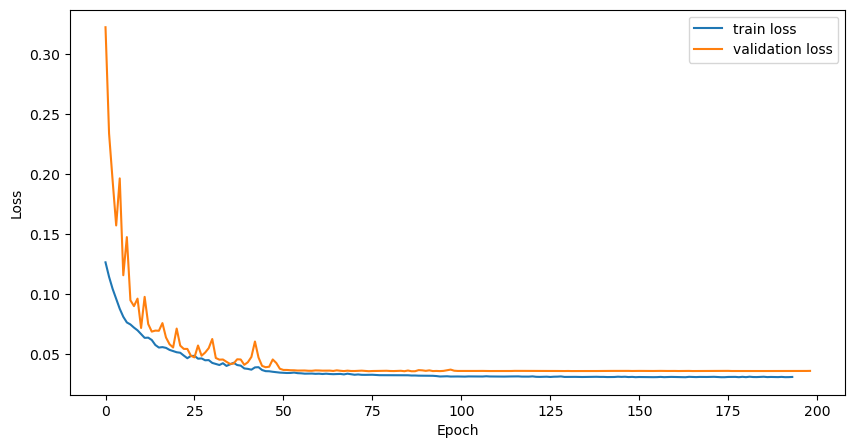

In [10]:
# Plot the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses_, label='train loss')
plt.plot(val_losses_, label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

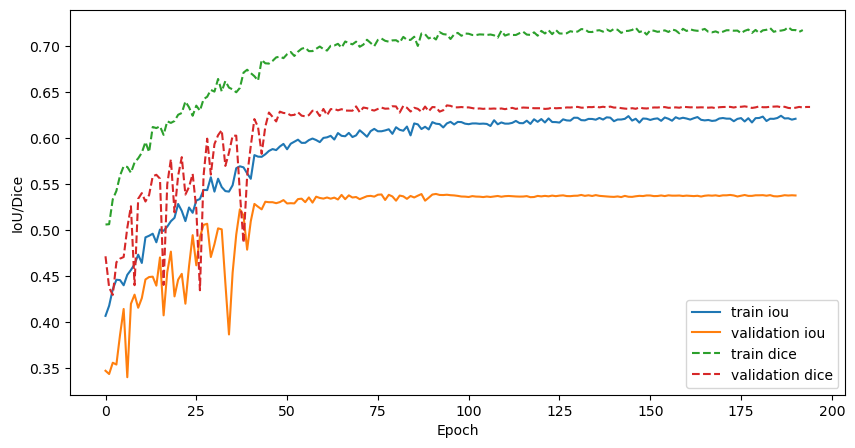

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(remove_outliers(train_ious), label='train iou')
plt.plot(remove_outliers(val_ious), label='validation iou')
plt.plot(remove_outliers(train_dices), label='train dice', linestyle='dashed')
plt.plot(remove_outliers(val_dices), label='validation dice', linestyle='dashed')
plt.xlabel('Epoch')
plt.ylabel('IoU/Dice')
plt.legend()

## Performance on test data

In [12]:
del model  
del optimizer  
del criterion  

# Clear the cache
torch.cuda.empty_cache()

In [13]:
model = UNet(in_channels=6, out_channels=1).to(device)
model.load_state_dict(torch.load('../data/lesson_1/model_weights/unet_levir_cd_baseline.pth'))
criterion = nn.BCELoss()
epoch_loss, mean_iou, mean_dice = validate_model(model, test_loader, criterion)
print(f'Loss: {epoch_loss:.4f}, IoU: {mean_iou:.4f}, DICE: {mean_dice:.4f}')

Loss: 0.0426, IoU: 0.5783, DICE: 0.6789


In [ ]:
Loss: 0.0448, IoU: 0.5620, DICE: 0.6673

## Visualization

In [ ]:
visualize_test_results(model, test_loader, num_examples=5)